###**Kasus 3: Mengelola Transformasi Tenaga Kerja di PT Nusantara Agri Teknologi**

PT Nusantara Agri Teknologi (NAT), perusahaan agribisnis yang telah beroperasi lebih dari tiga dekade, tengah menghadapi transformasi signifikan dalam struktur tenaga kerja akibat penerapan sistem otomasi. Perubahan teknologi ini mengurangi kebutuhan pekerja tidak terampil, sekaligus meningkatkan kebutuhan pekerja semi-terampil dan terampil secara drastis. Proyeksi tiga tahun menunjukkan pergeseran jumlah tenaga kerja dari 2000 pekerja tidak terampil menjadi nol, sementara kebutuhan semi-terampil meningkat hingga 2500 pekerja dan terampil hingga 2000 pekerja.

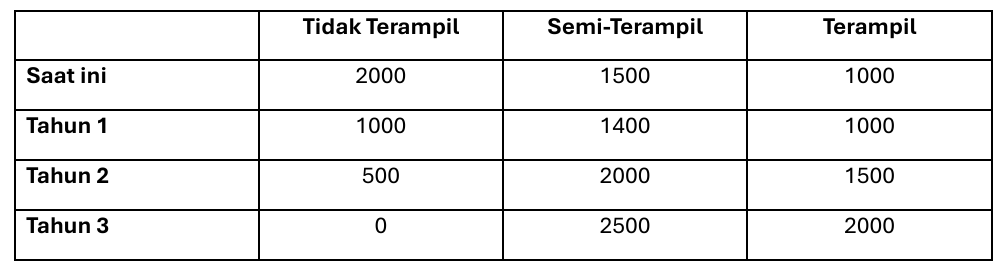

Menghadapi kondisi tersebut, perusahaan perlu menyusun strategi pengelolaan tenaga kerja yang tepat. Berbagai opsi tersedia dengan keterbatasan dan konsekuensi masing-masing. Perekrutan baru dibatasi hingga maksimal 500 pekerja tidak terampil, 800 pekerja semi-terampil, dan 500 pekerja terampil per tahun. Pelatihan ulang dapat dilakukan dengan biaya tertentu, namun jumlahnya terbatas, yakni 200 pekerja per tahun untuk peningkatan dari tidak terampil ke semi-terampil dengan biaya 4 juta rupiah per pekerja, serta maksimal 25% dari tenaga kerja terampil untuk peningkatan dari semi-terampil ke terampil dengan biaya 5 juta rupiah per pekerja. Terdapat pula opsi penurunan keterampilan, tetapi berisiko kehilangan hingga 50% pekerja yang dialihkan.

Perusahaan juga perlu memperhitungkan adanya pengurangan alami (attrition) yang terjadi setiap tahun. Tingkat pengurangan ini berbeda menurut kategori pekerja dan masa kerja yang dimiliki. Rinciannya ditunjukkan pada tabel berikut:

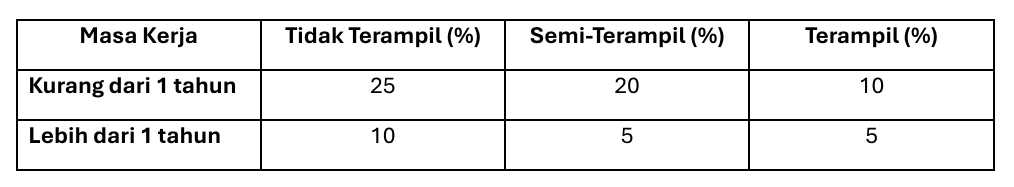

Jika terpaksa dilakukan pemutusan hubungan kerja, perusahaan harus menanggung biaya pesangon, yaitu Rp 2 juta per pekerja tidak terampil dan Rp 5 juta per pekerja semi-terampil maupun terampil.

Sebagai alternatif, terdapat opsi penambahan staf ekstra dan kerja waktu pendek. Penambahan staf ekstra diperbolehkan hingga 150 pekerja di seluruh kategori, namun biaya tahunannya cukup tinggi, yakni Rp 150 juta per pekerja tidak terampil, Rp 200 juta per semi-terampil, dan Rp 300 juta per terampil. Opsi ini memberi fleksibilitas tambahan, tetapi berdampak signifikan terhadap anggaran gaji perusahaan. Sementara itu, skema kerja waktu pendek dapat diterapkan pada maksimal 50 pekerja per kategori. Biayanya relatif rendah, yakni Rp 50 juta per pekerja tidak terampil, Rp 70 juta per semi-terampil, dan Rp 100 juta per terampil, namun produktivitas pekerja hanya setara setengah dari karyawan penuh waktu. Dengan demikian, meskipun lebih hemat secara biaya, kontribusi tenaga kerja dari skema ini juga terbatas.



Kondisi ini menimbulkan dilema: di satu sisi perusahaan harus menekan biaya agar tetap kompetitif, di sisi lain terdapat tanggung jawab sosial untuk meminimalkan jumlah pekerja yang harus diberhentikan. Oleh karena itu, diperlukan pendekatan berbasis riset operasi untuk merumuskan strategi optimal, dengan dua skenario utama: meminimalkan jumlah pengurangan tenaga kerja dan meminimalkan total biaya transformasi ketenagakerjaan.

##**Penyelesaian**

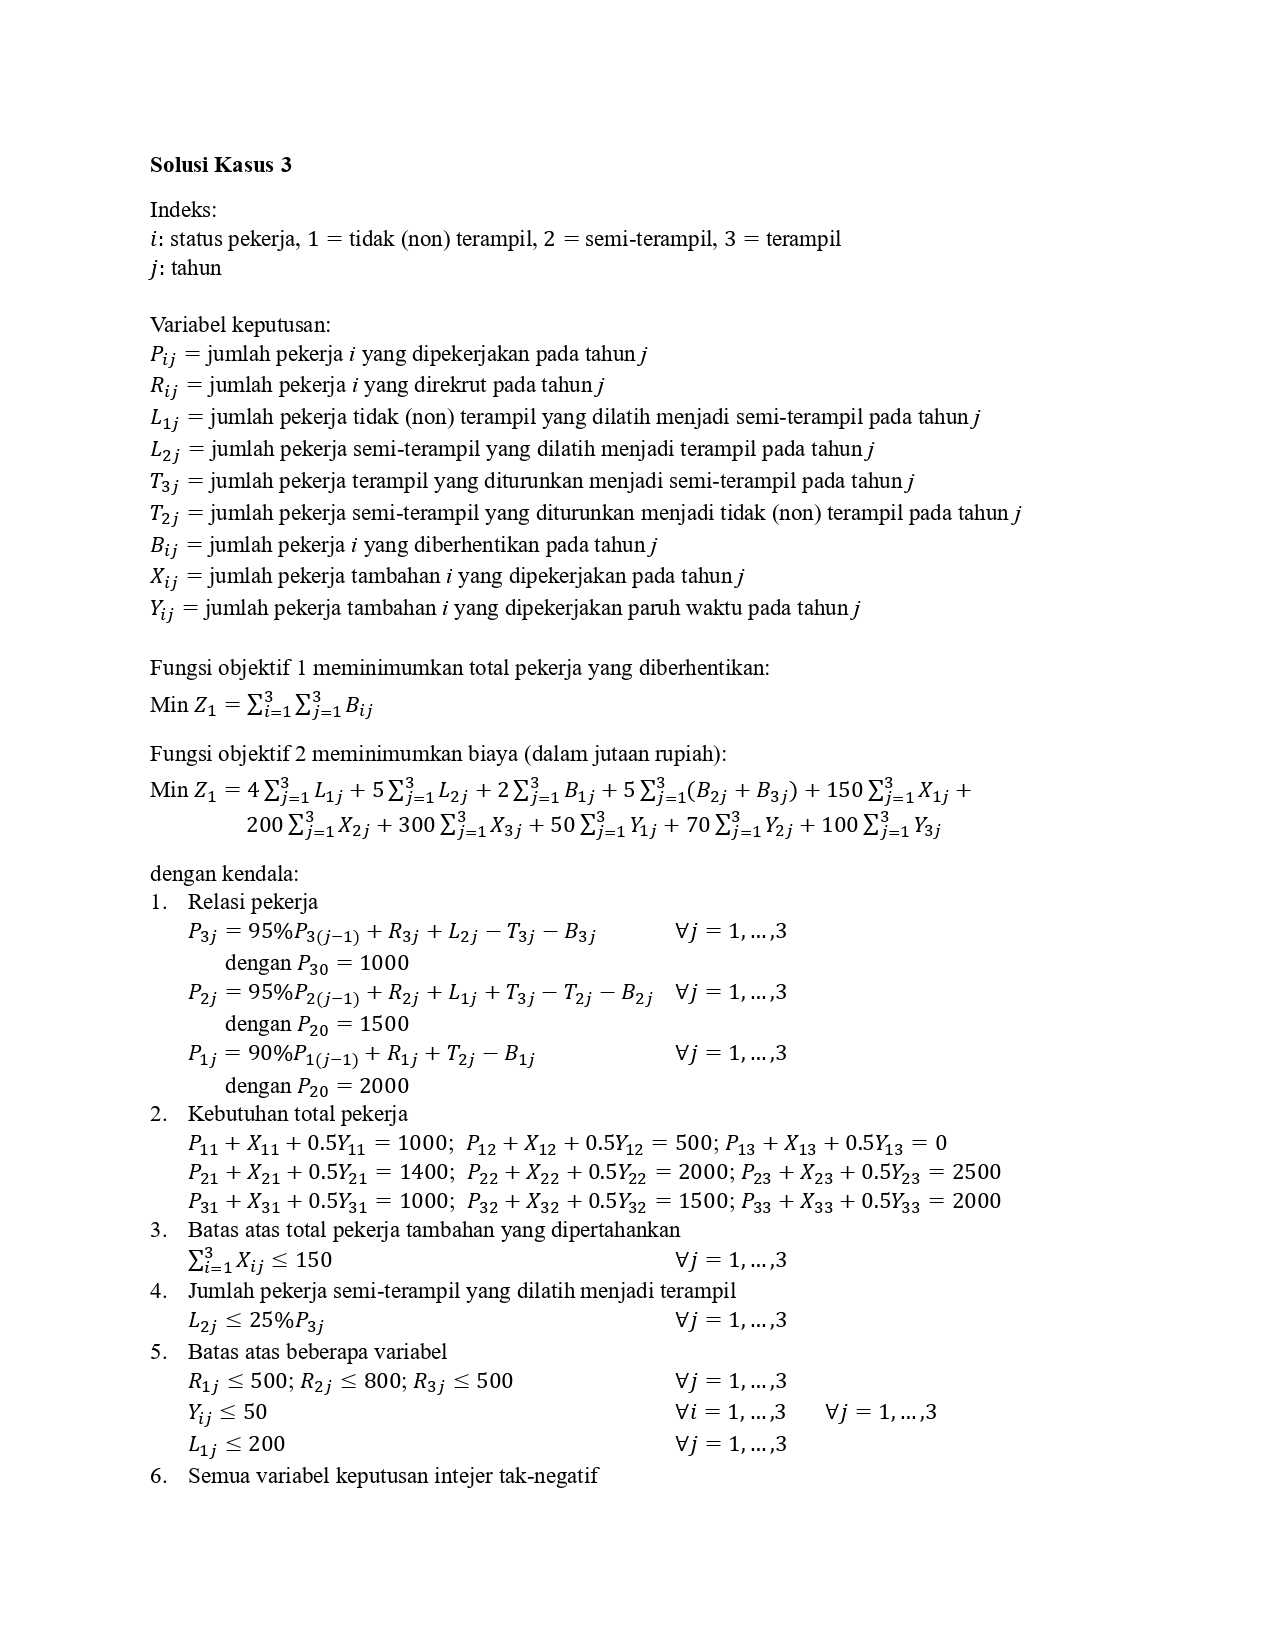

##**Implementasi Pyomo**

Pyomo adalah alat bantu dalam Riset Operasi yang menggunakan Python untuk membuat dan menyelesaikan model matematika guna mengoptimalkan solusi dari berbagai masalah optimasi (maksimisasi dan minimisasi).

In [ ]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

In [ ]:
from pyomo.environ import *

In [ ]:
# Model
model = ConcreteModel()

# Indeks status pekerja dan tahun
model.M = RangeSet(1,3)
model.N = RangeSet(1,3)

# Variabel keputusan
model.p = Var(model.M,model.N, within=NonNegativeIntegers)
model.r = Var(model.M,model.N, within=NonNegativeIntegers)
model.b = Var(model.M,model.N, within=NonNegativeIntegers)
model.x = Var(model.M,model.N, within=NonNegativeIntegers)
model.y = Var(model.M,model.N, within=NonNegativeIntegers)
model.l1 = Var(model.N, within=NonNegativeIntegers)
model.l2 = Var(model.N, within=NonNegativeIntegers)
model.t2 = Var(model.N, within=NonNegativeIntegers)
model.t3 = Var(model.N, within=NonNegativeIntegers)

# Objektif 1: Minimalkan total pekerja yang diberhentikan
def obj_func1(model):
    return sum(model.b[i,j] for i in model.M for j in model.N)

# Objektif 2: Minimalkan biaya (dalam juta rupiah)
def obj_func2(model):
    return (4 * sum(model.l1[j] for j in model.N) +
            5 * sum(model.l2[j] for j in model.N) +
            2 * sum(model.b[1,j] for j in model.N) +
            5 * sum(model.b[2,j] + model.b[3,j] for j in model.N) +
            150 * sum(model.x[1,j] for j in model.N) +
            200 * sum(model.x[2,j] for j in model.N) +
            300 * sum(model.x[3,j] for j in model.N) +
            50 * sum(model.y[1,j] for j in model.N) +
            70 * sum(model.y[2,j] for j in model.N) +
            100 * sum(model.y[3,j] for j in model.N))

# Objektif Model: Minimalkan PHK
model.objective = Objective(rule=obj_func1, sense=minimize)


# Relasi Pekerja
def rule_const1a(model,N):
    if N!=1:
        return model.p[3,N] == 0.95*model.p[3,N-1] + model.r[3,N] + model.l2[N] - model.t3[N] - model.b[3,N]
    else:
        return Constraint.Skip
model.const1a = Constraint(model.N,rule=rule_const1a)

def rule_const1b(model,N):
    if N!=1:
        return model.p[2,N] == 0.95*model.p[2,N-1] + model.r[2,N] + model.l1[N] + model.t3[N] - model.t2[N] - model.b[2,N]
    else:
        return Constraint.Skip
model.const1b = Constraint(model.N,rule=rule_const1b)

def rule_const1c(model,N):
    if N!=1:
        return model.p[1,N] == 0.90*model.p[1,N-1] + model.r[1,N] + model.t2[N] - model.b[1,N]
    else:
        return Constraint.Skip
model.const1c = Constraint(model.N,rule=rule_const1c)

model.const1d = Constraint(expr = model.p[3,1] == 0.95*1000 + model.r[3,1] + model.l2[1] - model.t3[1] - model.b[3,1])
model.const1e = Constraint(expr = model.p[2,1] == 0.95*1500 + model.r[2,1] + model.l1[1] + model.t3[1] - model.t2[1] - model.b[2,1])
model.const1f = Constraint(expr = model.p[1,1] == 0.90*2000 + model.r[1,1] + model.t2[1] - model.b[1,1])

# Kebutuhan total pekerja
model.const2a = Constraint(expr = model.p[1,1] + model.x[1,1] + 0.5*model.y[1,1] == 1000)
model.const2b = Constraint(expr = model.p[1,2] + model.x[1,2] + 0.5*model.y[1,2] == 500)
model.const2c = Constraint(expr = model.p[1,3] + model.x[1,3] + 0.5*model.y[1,3] == 0)
model.const2d = Constraint(expr = model.p[2,1] + model.x[2,1] + 0.5*model.y[2,1] == 1400)
model.const2e = Constraint(expr = model.p[2,2] + model.x[2,2] + 0.5*model.y[2,2] == 2000)
model.const2f = Constraint(expr = model.p[2,3] + model.x[2,3] + 0.5*model.y[2,3] == 2500)
model.const2g = Constraint(expr = model.p[3,1] + model.x[3,1] + 0.5*model.y[3,1] == 1000)
model.const2h = Constraint(expr = model.p[3,2] + model.x[3,2] + 0.5*model.y[3,2] == 1500)
model.const2i = Constraint(expr = model.p[3,3] + model.x[3,3] + 0.5*model.y[3,3] == 2000)

# Batas atas total pekerja tambahan yang dipertahankan
def rule_const3(model,N):
    return sum(model.x[i,N] for i in model.M) <= 150
model.const3 = Constraint(model.N,rule=rule_const3)

# Jumlah pekerja semi-terampil yang dilatih menjadi terampil
def rule_const4(model,N):
    return model.l2[N] <= 0.25*model.p[3,N]
model.const4 = Constraint(model.N,rule=rule_const4)

# Batas maksimal jumlah pekerja yang direkrut
def rule_const5a(model,N):
    return model.r[1,N] <= 500
model.const5a = Constraint(model.N,rule=rule_const5a)

def rule_const5b(model,N):
    return model.r[2,N] <= 800
model.const5b = Constraint(model.N,rule=rule_const5b)

def rule_const5c(model,N):
    return model.r[3,N] <= 500
model.const5c = Constraint(model.N,rule=rule_const5c)

# Batas maksimal jumlah pekerja tambahan yang dipekerjakan
def rule_const5d(model,M,N):
    return model.y[M,N] <= 50
model.const5d = Constraint(model.M,model.N,rule=rule_const5d)

# Batas maksimal jumlah pekerja tidak-terampil yang dilatih menjadi semi-terampil
def rule_const5e(model,N):
    return model.l1[N] <= 200
model.const5e = Constraint(model.N,rule=rule_const5e)

# Penyelesaian - menggunakan solver GLPK
solver = SolverFactory('glpk')
result = solver.solve(model)

# Display output nilai variabel keputusan
print('Status solusi:', result.solver.termination_condition)

# Hitung kedua nilai objektif untuk perbandingan
z1_value = sum(value(model.b[i,j]) for i in model.M for j in model.N)
z2_value = (4 * sum(value(model.l1[j]) for j in model.N) +
            5 * sum(value(model.l2[j]) for j in model.N) +
            2 * sum(value(model.b[1,j]) for j in model.N) +
            5 * sum(value(model.b[2,j]) + value(model.b[3,j]) for j in model.N) +
            150 * sum(value(model.x[1,j]) for j in model.N) +
            200 * sum(value(model.x[2,j]) for j in model.N) +
            300 * sum(value(model.x[3,j]) for j in model.N) +
            50 * sum(value(model.y[1,j]) for j in model.N) +
            70 * sum(value(model.y[2,j]) for j in model.N) +
            100 * sum(value(model.y[3,j]) for j in model.N))

print(f'\nNilai kedua fungsi objektif:')
print(f'Z1 (Total PHK): {z1_value} orang')
print(f'Z2 (Total Biaya): {z2_value} juta rupiah')

print('\n--- Variabel l1 ---')
for i in model.N:
    print(f'l1[{i}] = {value(model.l1[i])}')

print('\n--- Variabel l2 ---')
for i in model.N:
    print(f'l2[{i}] = {value(model.l2[i])}')

print('\n--- Variabel t2 ---')
for i in model.N:
    print(f't2[{i}] = {value(model.t2[i])}')

print('\n--- Variabel t3 ---')
for i in model.N:
    print(f't3[{i}] = {value(model.t3[i])}')

print('\n--- Variabel p ---')
for i in model.M:
    for j in model.N:
        print(f'p[{i},{j}] = {value(model.p[i,j])}')

print('\n--- Variabel r ---')
for i in model.M:
    for j in model.N:
        print(f'r[{i},{j}] = {value(model.r[i,j])}')

print('\n--- Variabel b ---')
for i in model.M:
    for j in model.N:
        print(f'b[{i},{j}] = {value(model.b[i,j])}')

print('\n--- Variabel x ---')
for i in model.M:
    for j in model.N:
        print(f'x[{i},{j}] = {value(model.x[i,j])}')

print('\n--- Variabel y ---')
for i in model.M:
    for j in model.N:
        print(f'y[{i},{j}] = {value(model.y[i,j])}')

Status solusi: optimal

Nilai kedua fungsi objektif:
Z1 (Total PHK): 1675.0 orang
Z2 (Total Biaya): 81263.0 juta rupiah

--- Variabel l1 ---
l1[1] = 0.0
l1[2] = 200.0
l1[3] = 117.0

--- Variabel l2 ---
l2[1] = 30.0
l2[2] = 375.0
l2[3] = 489.0

--- Variabel t2 ---
t2[1] = 0.0
t2[2] = 0.0
t2[3] = 0.0

--- Variabel t3 ---
t3[1] = 0.0
t3[2] = 0.0
t3[3] = 1.0

--- Variabel p ---
p[1,1] = 1000.0
p[1,2] = 500.0
p[1,3] = 0.0
p[2,1] = 1400.0
p[2,2] = 1840.0
p[2,3] = 2325.0
p[3,1] = 980.0
p[3,2] = 1500.0
p[3,3] = 1984.0

--- Variabel r ---
r[1,1] = 0.0
r[1,2] = 0.0
r[1,3] = 0.0
r[2,1] = 0.0
r[2,2] = 310.0
r[2,3] = 459.0
r[3,1] = 0.0
r[3,2] = 194.0
r[3,3] = 71.0

--- Variabel b ---
b[1,1] = 800.0
b[1,2] = 400.0
b[1,3] = 450.0
b[2,1] = 25.0
b[2,2] = 0.0
b[2,3] = 0.0
b[3,1] = 0.0
b[3,2] = 0.0
b[3,3] = 0.0

--- Variabel x ---
x[1,1] = 0.0
x[1,2] = 0.0
x[1,3] = 0.0
x[2,1] = 0.0
x[2,2] = 150.0
x[2,3] = 150.0
x[3,1] = 0.0
x[3,2] = 0.0
x[3,3] = 0.0

--- Variabel y ---
y[1,1] = 0.0
y[1,2] = 0.0
y[1,3] = 



---


Berdasarkan hasil solusi optimal model optimasi, perusahaan berhasil meminimalkan total pemberhentian pekerja menjadi **1.675 orang** dengan total biaya sebesar **81.263 miliar rupiah** melalui strategi restrukturisasi yang komprehensif. Solusi ini menunjukkan transformasi signifikan dalam komposisi tenaga kerja perusahaan selama tiga tahun.



**Restrukturisasi Tenaga Kerja**
- PHK 1.650 pekerja non-terampil (800 di tahun 1, 400 di tahun 2, 450 di tahun 3)
- PHK 25 pekerja semi-terampil (hanya di tahun 1)
- Tidak ada PHK untuk pekerja terampil

**Program Pelatihan Intensif**
- 317 pekerja non-terampil dilatih menjadi semi-terampil
- 894 pekerja semi-terampil dilatih menjadi terampil
- Total 1.211 pekerja ditingkatkan keterampilannya

**Rekrutmen Terkendali**
- Tidak merekrut pekerja non-terampil baru
- Merekrut 769 pekerja semi-terampil
- Merekrut 265 pekerja terampil
- Total rekrutmen: 1.034 pekerja

**Optimasi Tenaga Kerja Fleksibel**
- Memanfaatkan 300 pekerja tambahan semi-terampil
- Menggunakan 142 pekerja paruh waktu (terampil & semi-terampil)